<a href="https://colab.research.google.com/github/tiffanytang34/Shopify_DSchallenge/blob/main/Shopify_dschallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Shopify Data Science Challenge

Leqi Tang (Tiffany) \
Apr 21, 2022

## Question 1
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the dataset

data = pd.read_csv('/content/drive/My Drive/shopify_datachallenge/Shopify.csv') 

In [3]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [89]:
# description of the order amount
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [91]:
# average order value (AOV) calculated by Shopify. 
AOV = data['order_amount'].sum()/data['order_amount'].count()
AOV

3145.128

### 1a: Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
From above description of **order_amount** and calculation of average order value, we can see the amount 3145.13$ was obtained by taking the average of the order amount column. However, from the **max** and **std** of the **order_amount**, we note that the mean is largely influenced by the extreme max value: *704000* which have 17 orders. Thus we can see that the mean is not a good estimate of the AOV. 

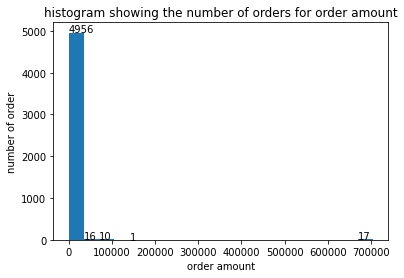

In [114]:

arr=plt.hist(data['order_amount'],bins=20)
plt.xlabel('order amount')
plt.ylabel('number of order')
plt.title('histogram showing the number of orders for order amount')
for i in range(20):
  if (int(arr[0][i])!=0):
      plt.text(arr[1][i],arr[0][i]+2,int(arr[0][i]))
#plt.hist(data['order_amount'], bins = 100)
plt.show()


### 1b: What metric would you report for this dataset?
The **median** of the order amount would be better to evaluate the data. Because the median depends on the sorted order of data, the extreme outliers would not influence the median of the data.

### 1c: What is its value?
From the description of the **order amount**, we have **median** as 284$.

## Question 2
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### 2a: How many orders were shipped by Speedy Express in total?
 Answer: 54

In [ ]:
SELECT count(*) FROM Orders a JOIN Shippers b ON a.ShipperID = b.ShipperID
WHERE b.ShipperName = "Speedy Express"


### 2b: What is the last name of the employee with the most orders?
Answer: Peacock

In [ ]:
SELECT a.LastName FROM Employees a JOIN Orders b on a.EmployeeID = b.EmployeeID 
GROUP BY a.EmployeeID
ORDER BY count(*) DESC
LIMIT 1

### 2c: What product was ordered the most by customers in Germany?
Answer: Steeleye Stout

In [ ]:
SELECT ProductName FROM Products a JOIN OrderDetails b ON b.ProductID = a.ProductID 
JOIN Orders c ON c.OrderID = b.OrderID
JOIN Customers d ON d.CustomerID = c.CustomerID 
WHERE Country = "Germany"
ORDER BY Quantity DESC
LIMIT 1